<a href="https://colab.research.google.com/github/SuzaDamaRoja/CIENCIAS_DATOS/blob/main/Taller_2_Introducci%C3%B3n_a_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes:**
- Andrés Eduardo Cristancho Rincón
- Danna Pauleth Lopez Acosta

#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

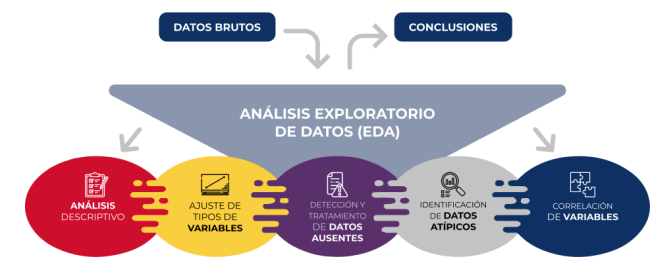

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

El personaje de Jack Dawson, subió al Titanic a la edad de 22 años (Wikipedia). No se encontró más información respecto a este personaje, por lo que sólo se analizarán 2 varaibles: género y edad.

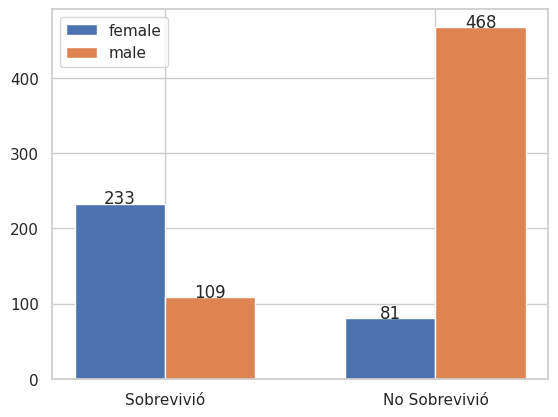

        Sobrevivió  No Sobrevivió
Hombre         109            468
Mujer          233             81


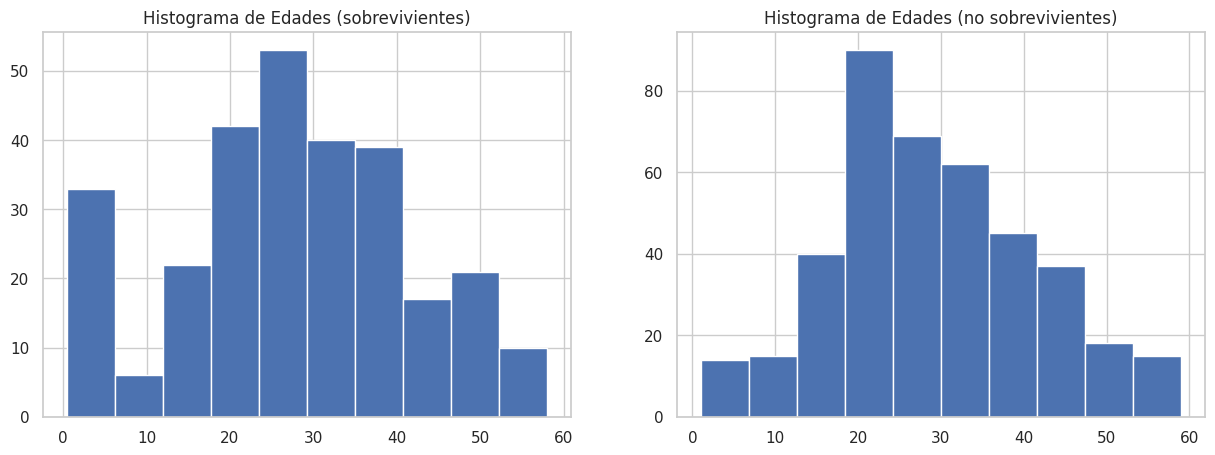

In [48]:
from re import I
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
df = pd.read_csv ('titanic.csv')

sobrevivio = df.loc [df['Survived'] == 1]
no_sobrevivio = df.loc [df['Survived'] == 0]

# Genero

generos = set (df['Sex'])

plt.figure (1)
for index, genero in enumerate (generos):
    sob = sobrevivio.loc [sobrevivio["Sex"] == genero]
    no_sob = no_sobrevivio.loc [no_sobrevivio["Sex"] == genero]
    labels = ["Sobrevivio", "No sobrevivio"]
    alturas = [len (sob), len (no_sob)]

    if index == 0:
        plt.bar ([-0.25, 1.25], height = alturas, width = 0.5, label = genero)
        plt.text (-0.25, len (sob), len (sob), fontdict = {"ha": "center"})
        plt.text ( 1.25, len (no_sob), len (no_sob), fontdict = {"ha": "center"})
    else:
        plt.bar ([0.25, 1.75], height = alturas, width = 0.5, label = genero)
        plt.text (0.25, len (sob), len (sob), fontdict = {"ha": "center"})
        plt.text (1.75, len (no_sob), len (no_sob), fontdict = {"ha": "center"})

plt.legend ()
plt.xticks ([0, 1.5], ["Sobrevivió", "No Sobrevivió"])
plt.show ()

tabla = {
    "Sobrevivió": [109, 233],
    "No Sobrevivió": [468, 81]
}

tabla = pd.DataFrame (tabla,  index = ["Hombre", "Mujer"])
print (tabla)

# Edad

plt.figure (2, figsize = (15, 5))
plt.subplot (1, 2, 1)
edad_sob = sobrevivio ["Age"] [sobrevivio["Age"] < 60]
# edad_sob = edad_sob [edad_sob > 18]
plt.hist (edad_sob, bins = 10)
plt.title ("Histograma de Edades (sobrevivientes)")

plt.subplot (1, 2, 2)
edad_no_sob = no_sobrevivio ["Age"] [no_sobrevivio["Age"] < 60]
# edad_no_sob = edad_no_sob [edad_no_sob > 18]
plt.hist (edad_no_sob, bins = 10)
plt.title ("Histograma de Edades (no sobrevivientes)")
plt.show ()

Se concluye que:
-   La distribución de las edades que sobrevivieron es más densa para rangos entre 25-30 años, mientras que la concentración de edades no sobrevivientes entre 20-25 años.
-   Sin embargo, fue mayor el grupo de mujeres que el de hombres que sobrevivieron, y fue mayor el grupo de hombres que murieron que el de mujeres.
    De modo que:

    - P(Hombre)=P(H)=577/891=64.75%.
    - P(Mujer)=P(M)=314/891=35.24%.
    - P(Sobrevivió)=P(S)=342/891=38.38%.
    - P(No Sobrevivió)=P(N)=549/891=61.61%.

    Por tanto,
    - La probabilidad de que un hombre sobreviva es: P(S|H)=109/577=18.89%.
    - La probabilidad de que alquien que sobreviva sea hombre es: P(H|S)=P(H)*P(S|H)/P(S)=31.87%.
- Por tanto, es bastante probable que Jack no haya podido sobrevivir.

Cómo podemos llenar los datos nulos?

Se podría asignar nuevos valores según las distribuciones de las columnas que sí se tengan. Por ejemplo, se una datos se tiene la edad pero no la cabina, se podría ver cuál es la cabina más común para esa edad.

Los datos disponibles son suficientes para generar un modelo mínimo viable?

En cuante a sexo sí, pero para los otros no es suficiente como para que los datos sean suficientes.

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

In [49]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [52]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [53]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [54]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


Se utilizaron 71 muestras para entrenar el modelo
La precisión promedio de train es 0.84
La precisión promedio de test es 0.76

Se utilizaron 231 muestras para entrenar el modelo
La precisión promedio de train es 0.83
La precisión promedio de test es 0.76

Se utilizaron 391 muestras para entrenar el modelo
La precisión promedio de train es 0.82
La precisión promedio de test es 0.77

Se utilizaron 551 muestras para entrenar el modelo
La precisión promedio de train es 0.80
La precisión promedio de test es 0.78

Se utilizaron 712 muestras para entrenar el modelo
La precisión promedio de train es 0.80
La precisión promedio de test es 0.78



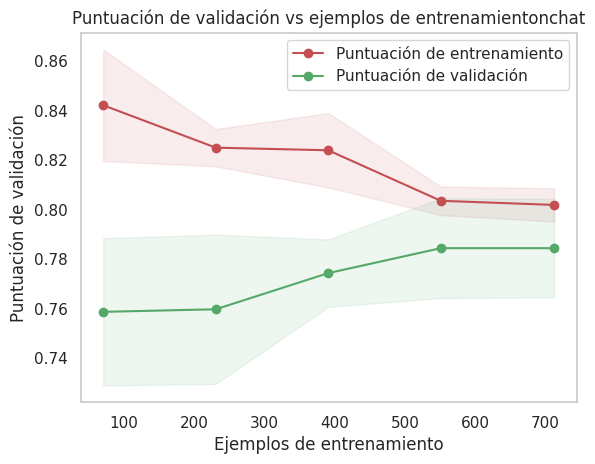

,Age,female,male,Survived
0,22.0,False,True,False
1,38.0,True,False,True
2,26.0,True,False,True
3,35.0,True,False,True
4,35.0,False,True,False
...,...,...,...,...
886,27.0,False,True,False
887,19.0,True,False,True
888,NaN,True,False,False
889,26.0,False,True,True


In [100]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    # if ylim is not None:
    #     plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
                                                            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    for train_size, train_scores, test_scores in zip(train_sizes, train_scores, test_scores):
        print(f"Se utilizaron {train_size} muestras para entrenar el modelo")
        print(f"La precisión promedio de train es {train_scores.mean():.2f}")
        print(f"La precisión promedio de test es {test_scores.mean():.2f}")
        print ()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt

tree = DecisionTreeClassifier(max_depth=4, random_state=42)

sex = pd.get_dummies (df["Sex"])
X  = df['Age']
X = pd.concat ([X, sex], axis = 1)
y = df['Survived'] == 1

plt = plot_learning_curve (tree, "Puntuación de validación vs ejemplos de entrenamientonchat", X, y)
plt.show ()

pd.concat([X, y], axis = 1)

Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

Esta función crea una curva de aprendizaje para evaluar cómo cambia el rendimiento del modelo (en este caso, un clasificador de árbol de decisión) a medida que se aumenta el número de ejemplos de entrenamiento.

Parámetros de la función:
- estimator: El modelo que se va a entrenar y evaluar (en este caso, DecisionTreeClassifier).
- title: Título del gráfico.
- X y y: Características (datos de entrada) y etiquetas (resultados deseados) respectivamente.
- xlim: Límites del eje X (no usado en este código).
- cv: El número de particiones para validación cruzada.
- n_jobs: Número de trabajos paralelos para computar los resultados.
- train_sizes: Proporción de ejemplos de entrenamiento a usar en cada paso del cálculo de la curva de aprendizaje.

Función en sí:
Esta función devuelve:
- train_sizes: Los tamaños de entrenamiento.
- train_scores: Las puntuaciones de entrenamiento.
- test_scores: Las puntuaciones de validación.

Cálculos:
Se calcula la media y desviación estándar de las puntuaciones de entrenamiento y validación.

Gráfica:
Se dibujan las curvas de puntuación de entrenamiento (en rojo) y validación (en verde), usando los valores promedio.
Se rellenan áreas alrededor de las curvas para representar la desviación estándar y dar una visualización de la variabilidad.

Este código crea una curva de aprendizaje para un árbol de decisión que predice si una persona sobrevivió o no (basado en su edad y sexo) en el conjunto de datos df. La curva muestra cómo varían las puntuaciones de validación y entrenamiento a medida que se aumenta el número de ejemplos de entrenamiento, lo que puede ser útil para detectar problemas como el sobreajuste o el subajuste en el modelo.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?